### MTD File

In [3]:
import pandas as pd
import re
from openpyxl import load_workbook

# Function to clean sheet names by removing invalid characters
def clean_sheet_name(name):
    return re.sub(r'[:\\/*?\[\]]', '', str(name))[:31]

# Define the column mapping based on sheet names
sheet_column_mapping = {
    'SCB': range(0, 27),
    'HTB': range(0, 28),
    'GB': range(0, 12),
    'REB': range(0, 26),
    'FSB': range(0, 14),
    'FB': range(0, 18),
    'AB': range(0, 9),
    'CSC': range(0, 21),
}

# Load the Excel file and list all sheets
file_path = r'01_data\2024_Segment_BU_Actual_09_2567.xlsx'
xls = pd.ExcelFile(file_path)
sheet_names = xls.sheet_names  # List all sheet names

# Define the keyword for splitting
split_keyword = 'MBK Group'

# Output Excel file
output_file = 'MTD_Segment_BU.xlsx'

# Create an Excel writer object to append data without overwriting
with pd.ExcelWriter(output_file, engine='openpyxl', mode='w') as writer:
    for sheet_name in sheet_names:
        all_data = pd.DataFrame()  # Initialize an empty DataFrame for each sheet

        if sheet_name not in sheet_column_mapping:
            print(f"Skipping sheet '{sheet_name}' as it's not in the mapping.")
            continue

        bu = sheet_name

        # Determine columns to keep based on the mapping
        columns_to_keep = sheet_column_mapping.get(sheet_name, range(12))  

        # Load each sheet and set row 2 as header
        df = pd.read_excel(file_path, sheet_name=sheet_name, header=1)

        # Find indices where 'MBK Group' appears in Column A
        split_indices = df[df.iloc[:, 0] == split_keyword].index.tolist()
        
        # Add the end of the DataFrame for the last segment
        split_indices.append(len(df))

        for i in range(len(split_indices) - 1):
            # Set the start and end indices (start from +3)
            start_idx = split_indices[i] + 3
            end_idx = split_indices[i + 1]

            # Extract the table and limit to the mapped columns
            table = df.iloc[start_idx:end_idx, columns_to_keep]

            # Drop completely empty rows
            table.dropna(how='all', inplace=True)

            # Get the date from the split index and clean it
            if (split_indices[i] + 2) < len(df):
                date_txt = clean_sheet_name(str(df.iloc[split_indices[i] + 2, 0]))[:11]
            else:
                date_txt = "Unknown-00"

            # Append Year, Month, and BU columns
            if '-' in date_txt:
                table['Year'] = date_txt.split('-')[0]
                table['Month'] = date_txt.split('-')[1]
            else:
                table['Year'] = 'Unknown'
                table['Month'] = 'Unknown'

            table['BU'] = bu

            # Append the data to the main DataFrame for this sheet
            all_data = pd.concat([all_data, table], ignore_index=True)

        # Save the data for each sheet in its own sheet within the Excel file
        all_data.to_excel(writer, sheet_name=bu, index=False)

print("Data appended, mapped with sheet names, and saved successfully to multiple sheets.")


Skipping sheet 'MBK_Group' as it's not in the mapping.
Skipping sheet 'AAA' as it's not in the mapping.
Data appended, mapped with sheet names, and saved successfully to multiple sheets.


### YTD File

In [4]:
import pandas as pd
import re
from openpyxl import load_workbook

# Function to clean sheet names by removing invalid characters
def clean_sheet_name(name):
    return re.sub(r'[:\\/*?\[\]]', '', str(name))[:31]

# Define the column mapping based on sheet names
sheet_column_mapping = {
    'SCB': range(28, 28+21),
    'HTB': range(29, 29+28),
    'GB': range(13, 13+12),
    'REB': range(27, 27+26),
    'FSB': range(15, 15+14),
    'FB': range(19, 19+18),
    'AB': range(10, 10+9),
    'CSC': range(22, 22+21),
}

# Load the Excel file and list all sheets
file_path = r'01_data\2024_Segment_BU_Actual_09_2567.xlsx'
xls = pd.ExcelFile(file_path)
sheet_names = xls.sheet_names  # List all sheet names

# Define the keyword for splitting
split_keyword = 'MBK Group'

# Output Excel file
output_file = 'YTD_Segment_BU.xlsx'

# Create an Excel writer object to append data without overwriting
with pd.ExcelWriter(output_file, engine='openpyxl', mode='w') as writer:
    for sheet_name in sheet_names:
        all_data = pd.DataFrame()  # Initialize an empty DataFrame for each sheet

        if sheet_name not in sheet_column_mapping:
            print(f"Skipping sheet '{sheet_name}' as it's not in the mapping.")
            continue

        bu = sheet_name

        # Determine columns to keep based on the mapping
        columns_to_keep = sheet_column_mapping.get(sheet_name, range(12))  

        # Load each sheet and set row 2 as header
        df = pd.read_excel(file_path, sheet_name=sheet_name, header=1)

        # Find indices where 'MBK Group' appears in Column A
        split_indices = df[df.iloc[:, 0] == split_keyword].index.tolist()
        
        # Add the end of the DataFrame for the last segment
        split_indices.append(len(df))

        for i in range(len(split_indices) - 1):
            # Set the start and end indices (start from +3)
            start_idx = split_indices[i] + 3
            end_idx = split_indices[i + 1]

            # Extract the table and limit to the mapped columns
            table = df.iloc[start_idx:end_idx, columns_to_keep]

            # Drop completely empty rows
            table.dropna(how='all', inplace=True)

            # Get the date from the split index and clean it
            if (split_indices[i] + 2) < len(df):
                date_txt = clean_sheet_name(str(df.iloc[split_indices[i] + 2, 0]))[:11]
            else:
                date_txt = "Unknown-00"

            # Append Year, Month, and BU columns
            if '-' in date_txt:
                table['Year'] = date_txt.split('-')[0]
                table['Month'] = date_txt.split('-')[1]
            else:
                table['Year'] = 'Unknown'
                table['Month'] = 'Unknown'

            table['BU'] = bu

            # Append the data to the main DataFrame for this sheet
            all_data = pd.concat([all_data, table], ignore_index=True)

        # Save the data for each sheet in its own sheet within the Excel file
        all_data.to_excel(writer, sheet_name=bu, index=False)

print("Data appended, mapped with sheet names, and saved successfully to multiple sheets.")


Skipping sheet 'MBK_Group' as it's not in the mapping.
Skipping sheet 'AAA' as it's not in the mapping.
Data appended, mapped with sheet names, and saved successfully to multiple sheets.


### Data Process

In [1]:
import pandas as pd
import re
from openpyxl import load_workbook
from dateutil import parser

# Function to clean sheet names by removing invalid characters
def clean_sheet_name(name):
    return re.sub(r'[:\\/*?\[\]]', '', str(name))

# Function to process dates dynamically
def process_date(date_txt):
    date_txt = re.sub(r'[^a-zA-Z0-9\s:-]', '', date_txt).strip()
    try:
        date_obj = parser.parse(date_txt, dayfirst=True)
        return date_obj.year, date_obj.strftime('%m')  # Year and zero-padded month
    except (ValueError, TypeError):
        return "Unknown", "Unknown"

# Define the column mapping based on sheet names
sheet_column_mapping = {
    'SCB': range(55), 'HTB': range(57), 'GB': range(25),
    'REB': range(53), 'FSB': range(29), 'FB': range(37),
    'AB': range(19), 'CSC': range(43),
}

# Load Excel file and list sheets
file_path = '01_data/2024_Segment_BU_Actual_09_2567.xlsx'
xls = pd.ExcelFile(file_path)
sheet_names = xls.sheet_names

# Define keyword for splitting
split_keyword = 'MBK Group'

# Output Excel file
output_file = '2024_Segment_BU_Actual_Optimized.xlsx'

# Process and save data
with pd.ExcelWriter(output_file, engine='openpyxl', mode='w') as writer:
    for sheet_name in sheet_names:
        if sheet_name not in sheet_column_mapping:
            print(f"Skipping '{sheet_name}' (not in mapping).")
            continue

        df = pd.read_excel(file_path, sheet_name=sheet_name, header=None)
        split_indices = df[df.iloc[:, 0] == split_keyword].index.tolist()
        split_col_indices = df.columns[df.iloc[0] == split_keyword].tolist()
        split_indices.append(len(df))  # Mark end of last segment

        all_data = []  # Collect transformed tables

        for i in range(len(split_indices) - 1):
            start_idx, end_idx = split_indices[i] + 3, split_indices[i + 1]
            table = df.iloc[start_idx:end_idx, sheet_column_mapping[sheet_name]].dropna(how='all')

            if table.empty:
                continue

            date_txt = clean_sheet_name(str(df.iloc[split_indices[i] + 2, 0])) if (split_indices[i] + 2) < len(df) else "Unknown-00"
            year, month = process_date(date_txt)

            # Ensure at least two columns exist for MTD and YTD split
            if len(table.columns) < 2:
                continue

            # Dynamically split MTD and YTD
            mid_point = split_col_indices[1] if len(split_col_indices) > 1 else len(table.columns) // 2
            mtd_data, ytd_data = table.iloc[:, :split_col_indices[1]-1], table.iloc[:, split_col_indices[1]:]
            ytd_data.columns = range(len(ytd_data.columns))

            # Ensure column 0 exists in MTD and YTD before melting
            if 0 not in mtd_data.columns or 0 not in ytd_data.columns:
                print(f"Skipping '{sheet_name}' due to missing column 0.")
                continue

            min_len = min(len(mtd_data.columns), len(ytd_data.columns), len(table))
            if min_len == 0:
                continue

            # Extract segment and sub-segment values dynamically
            segment_values = table.iloc[0, 1:].values
            sub_values = table.iloc[1, 1:].values

            # Drop headers from MTD/YTD data
            mtd_clean = mtd_data.iloc[2:].dropna(how='all')
            ytd_clean = ytd_data.iloc[2:].dropna(how='all')

            # Transform to long format
            try:
                mtd_melted = mtd_clean.melt(id_vars=[0], var_name="Type", value_name="MTD")
                ytd_melted = ytd_clean.melt(id_vars=[0], var_name="Type", value_name="YTD")
            except KeyError:
                print(f"Skipping '{sheet_name}' due to KeyError in melt operation.")
                continue

            mtd_melted["Type"] = mtd_melted["Type"]-1
            ytd_melted["Type"] = ytd_melted["Type"]-1

            # Ensure columns exist before merging
            if "Type" not in mtd_melted.columns or "Type" not in ytd_melted.columns:
                print(f"Skipping '{sheet_name}' due to missing 'Type' column.")
                continue

            # Merge based on List and Type
            merged_data = pd.merge(mtd_melted, ytd_melted, on=["Type",0], how="inner")

            # Assign segment and sub-segment dynamically
            segment_map = dict(zip(mtd_data.columns, segment_values))
            sub_map = dict(zip(mtd_data.columns, sub_values))

            merged_data["Year"], merged_data["Month"], merged_data["BU"] = year, month, sheet_name
            merged_data["Segment"], merged_data["Sub_Segment"] = merged_data["Type"].map(segment_map), merged_data["Type"].map(sub_map)

            # Rename columns and store the result
            merged_data.rename(columns={0: "List"}, inplace=True)
            all_data.append(merged_data[["List", "Type", "MTD", "YTD", "Segment", "Sub_Segment", "Year", "Month", "BU"]])

        if all_data:
            final_data = pd.concat(all_data, ignore_index=True)
            if not final_data.empty:
                final_data.to_excel(writer, sheet_name=sheet_name, index=False)

print("Data processed and saved successfully.")


Skipping 'MBK_Group' (not in mapping).
Skipping 'AAA' (not in mapping).
Data processed and saved successfully.


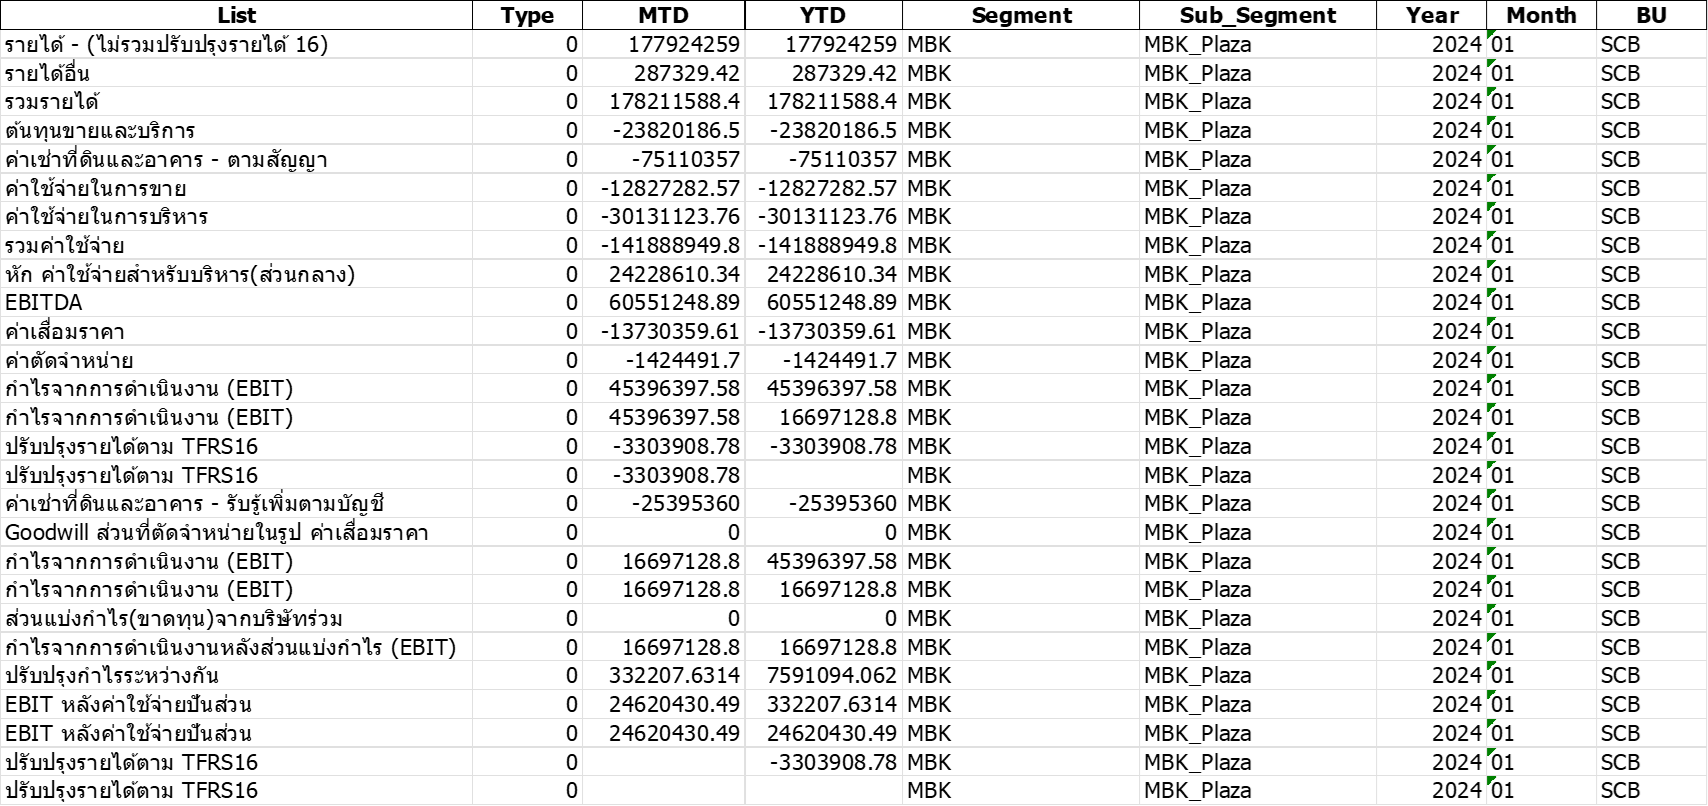
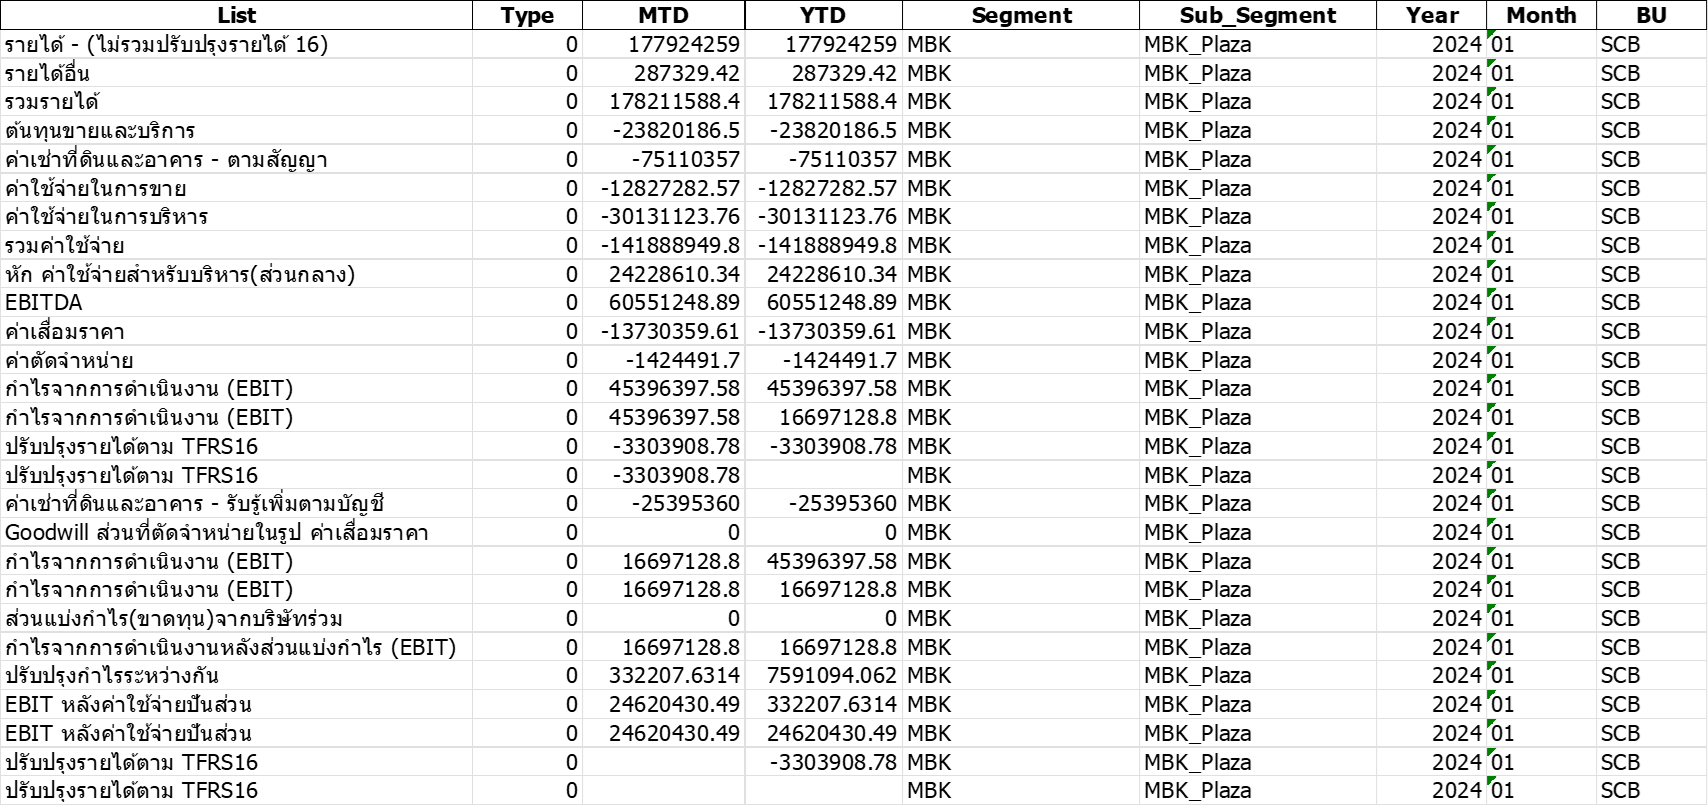